# TP3 : Mesure et génération des lois de probabilité
## Auteur : ARGUELLO Camilo

### Introduction

L'objectif de ce TP est de étudier la génération de loi de probabilité comme par exemple à partir d'une loi uniforme pouvoir générer une loi exponentielle. Nous allons aussi étudier la mesure de loi de probabilité pour le comptage d'un nombre d'événement dans un intervalle de temps. Finalement nous allons étudier la planche de Galton et son application à la loi de probabilité.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Génération d'une loi exponentielle à partir d'une loi uniforme

On considère la fonction de densité de probabilité :

$$ g(t) = \frac{1}{\tau} e^{-\frac{t}{\tau}} $$

Si on sait que:

$$ g(t) = \frac{d G(t)}{dt} $$

On peut montrer que la fonction cumulative de cette densité est :

$$ G(t) = \int_{0}^{t} g(t) dt $$

$$ G(t) = \int_{0}^{t} \frac{1}{\tau} e^{-\frac{t}{\tau}} dt $$

$$ G(t) = \frac{1}{\tau} \int_{0}^{t} e^{-\frac{t}{\tau}} dt $$

$$ G(t) = \frac{1}{\tau} \left[ -e^{-\frac{t}{\tau}} \right]_{0}^{t} $$

$$ G(t) = \frac{1}{\tau} \left[ -e^{-\frac{t}{\tau}} + 1 \right] $$

$$ G(t) = \frac{1}{\tau} \left[ 1 - e^{-\frac{t}{\tau}} \right] $$


Alors, notre première objectif est de vérifier que la fonction 

$$ h (x) = -\tau log(1-x) $$

est bien la fonction inverse de la fonction cumulative $G(t)$.

In [2]:
g = lambda t, T=0.2 : (1/T) * np.exp(-t / T)
G = lambda t, T=0.2 : (1/T) * (1 - np.exp(-t / T))
h = lambda x, T=0.2 : -T * np.log(1 - x)
f = lambda N : [random.random() for i in range(N)]

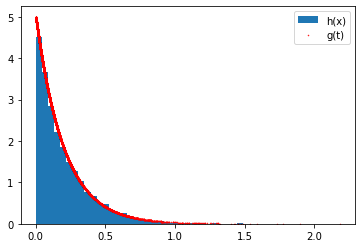

Valeur moyenne obtenue: 0.201
Valeur moyenne attendue: 0.458


In [3]:
# 1

N=10000
T=0.2 # s

h_x = [h(i) for i in f(N)] # F_inf
g_x = [g(i) for i in h_x] # f

n,bins,patches = plt.hist(h_x, bins=50, density=True, label='h(x)')
plt.plot(h_x,g_x,'r.',markersize=1, label='g(t)')
plt.legend()
plt.show()

print('Valeur moyenne obtenue: {:.3f}'.format(np.mean(h_x)))
print('Valeur moyenne attendue: {:.3f}'.format(np.mean(n)))

On peut voir que la fonction $h(x)$ est bien la fonction inverse de $G(t)$.

In [4]:
#2
calculate_event_times = lambda temps, T : [np.random.exponential(scale=g(t, T)) for t in temps]

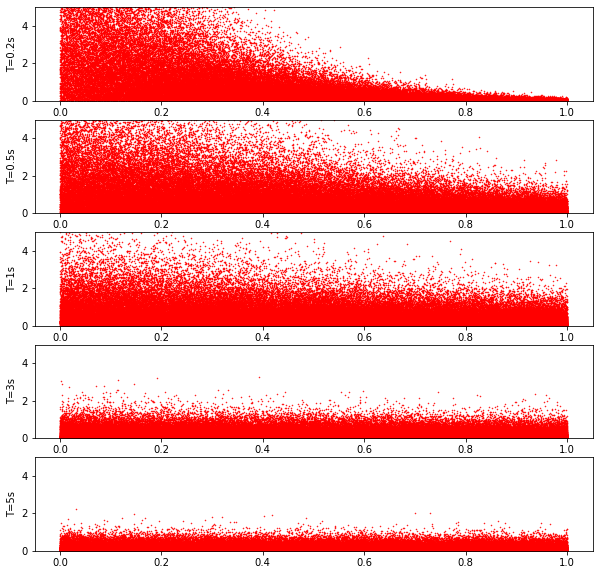

In [5]:
N = 100000
Ts = [0.2, 0.5, 1, 3, 5] # liste de temps

fig, axes = plt.subplots(len(Ts), 1, figsize=(10, 10))

for i,ax in enumerate(axes):
  times = f(N)
  event_times = calculate_event_times(times, Ts[i])
  ax.plot(times,event_times,'r.',markersize=1)
  ax.set_ylim([0, 5])
  ax.set_ylabel('T='+str(Ts[i])+'s')
plt.show()

## Planche de Galton

Question: Dans une panche de Galton avec n couches de clous, quelles sont les positions extrêmes que pourra
prendre la bille ?

Réponse: Les positions extrêmes sont 0 et 2n.

Question: Quelle est la loi de probabilité associé avec la direction de la bille après collision ?

Réponse: La loi de probabilité est uniforme sur {0, 1}.


In [6]:
# Planche de galton
N = 10
X = [random.random() for i in range(N)] # tirages
def get_position(X):
  if X == 0:
    return -1
  elif X == 1:
    return 1
  else:
    return 1/2
print(get_position(X))

0.5


In [7]:
def generate_random_variable():
  """Génère une variable aléatoire X dans [0, 1] avec p(X = 0) = p(X = 1) = 1/2."""
  return random.choice([0, 1])

def simulate_bead_movement(position=None):
  if position == None:
    position = 0;
  """Simule le déplacement d'une bille en ajoutant ±1 à sa position de façon aléatoire."""
  movement = generate_random_variable() * 2 - 1 # Génère -1 ou 1 aléatoirement
  return position + movement

def simulate_bead_position_after_layers(n):
  """Simule la position de la bille après n couches de clous."""
  position = 0
  for i in range(n):
    position = simulate_bead_movement(position)
  return position

In [8]:
ns = [10, 100, 1000, 10000, 100000]
for n in ns:
  x = simulate_bead_position_after_layers(n)
  print("Pour n={}, la position est {}".format(n,x))

Pour n=10, la position est 0
Pour n=100, la position est 2
Pour n=1000, la position est -10
Pour n=10000, la position est 148
Pour n=100000, la position est 180


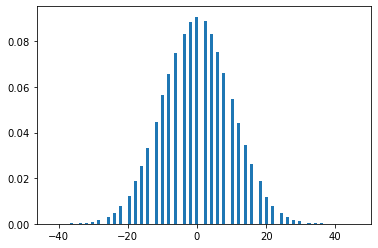

In [9]:
N = 100000 # tirages
n = 100 # clous

xs = [simulate_bead_position_after_layers(n) for i in range(N)]

n, bins, patches = plt.hist(xs, bins=n, density=True)
plt.show()

In [10]:
print('La valeur moyenne {:.5f}'.format(np.mean(n)))
print('La valeur variance {:.5f}'.format(np.var(n)))

La valeur moyenne 0.01136
La valeur variance 0.00060
